# Raaghav_CAT1

## Import Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [137]:
df = pd.read_csv("CIA1/Swarm_Behaviour.csv")
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


### Null Values

In [139]:
df.isna().sum().sum()

0

### Check for Imbalance

In [140]:
df['Swarm_Behaviour'].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

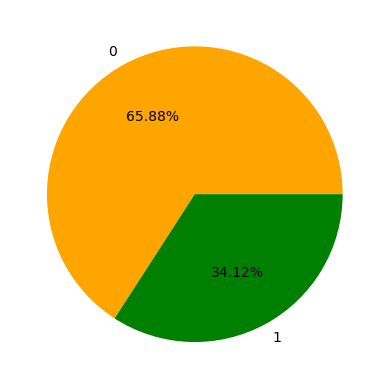

In [141]:
plt.pie(df['Swarm_Behaviour'].value_counts(), labels = ['0','1'],autopct='%.2f%%', colors=['orange','green'])
plt.show()

### Splitting the data

In [142]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train Test Split

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)

### SMOTE

In [144]:
smote = SMOTETomek(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [145]:
print(Counter(y_train_smote), Counter(y_train))

Counter({0.0: 10598, 1.0: 10598}) Counter({0.0: 10792, 1.0: 5524})


### Feature Scaling

In [146]:
sc = StandardScaler()
x_train_smote = sc.fit_transform(x_train_smote)
x_test = sc.transform(x_test)

## PCA

In [147]:
pca = PCA(n_components=400, random_state=0)
pca.fit(x_train_smote)
x_train_pca = pca.transform(x_train_smote)

In [148]:
x_test_pca = pca.transform(x_test)

## Logistic Regression

In [149]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train_smote, y_train_smote)

/home/rv/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [150]:
y_pred = log_reg.predict(x_test)

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      4563
         1.0       0.81      0.86      0.84      2430

    accuracy                           0.88      6993
   macro avg       0.87      0.88      0.87      6993
weighted avg       0.88      0.88      0.88      6993



## KNN

In [152]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train_smote, y_train_smote)
y_pred_knn = clf.predict(x_test)

In [153]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      4563
         1.0       0.80      0.92      0.86      2430

    accuracy                           0.89      6993
   macro avg       0.88      0.90      0.89      6993
weighted avg       0.90      0.89      0.90      6993



## Decision Tree

In [154]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [155]:
y_pred_dt = tree.predict(x_test)

In [156]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      4563
         1.0       0.79      0.98      0.87      2430

    accuracy                           0.90      6993
   macro avg       0.89      0.92      0.90      6993
weighted avg       0.92      0.90      0.90      6993



## Result

Accuracy
- Logistic Regression = 0.88
- KNN = 0.89
- Decision Tree = 0.90